In [4]:
import pandas as pd
import numpy as np 
#### 
from sklearn.model_selection import train_test_split , StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
#df = pd.read_csv('./2K_1420_part_1234567features.csv',delimiter=';',index_col=False) 




df = pd.read_csv('/Users/pooyan/Documents/Emerson/data/data.csv', index_col=False, sep=";", header=0)
#set 0 as normal as 1 as abnormal
df.insert(3, 'target', 0)

# df.drop('Rows Header(1)')
df



indexes = []
df['target']= 0

indexes = df[df['RU.LNG.214LRSA450.PV'] <= 47].index | \
df[df['RU.LNG.214LRSA450.PV'] <= 45].index | \
df[df['RU.LNG.214TRA220.PV'] > df['RU.LNG.214TRA220.PV'].quantile(0.99)].index  |\
df[df['RU.LNG.214PRA218C.PV'] < df['RU.LNG.214PRA218C.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214TRA476A.PV'] < df['RU.LNG.214TRA476A.PV'].quantile(0.01)].index  |\
df[df['RU.LNG.214PZA451A.PV'] < df['RU.LNG.214PZA451A.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PDRA425.PV'] < df['RU.LNG.214PDRA425.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PRA431.PV'] > df['RU.LNG.214PRA431.PV'].quantile(0.99)].index  |\
df[df['RU.LNG.214PRA434.PV'] > df['RU.LNG.214PRA434.PV'].quantile(0.99)].index  |\
df[df['RU.LNG.214PRA218.PV'] < df['RU.LNG.214PRA218.PV'].quantile(0.01)].index  |\
df[df['RU.LNG.214PDRA436.PV'] < df['RU.LNG.214PDRA436.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214SZA458.PV'] < df['RU.LNG.214SZA458.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PRA221A.PV'] < df['RU.LNG.214PRA221A.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PRA221B.PV'] < df['RU.LNG.214PRA221B.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214TR210.PV'] > df['RU.LNG.214TR210.PV'].quantile(0.99)].index |\
df[df['RU.LNG.214PRA218A.PV'] < df['RU.LNG.214PRA218A.PV'].quantile(0.01)].index 

#df[df['RU.LNG.214TRA476A.PV'] > df['RU.LNG.214TRA476A.PV'].quantile(0.99)].index   |\

df.loc[indexes, 'target'] = 1
print("Abnormal samples: ",len(df[df['target']==1]), "Normal samples: ",len(df[df['target']==0]) )

Abnormal samples:  3388 Normal samples:  67173


<ipython-input-4-df0d40ea29bc>:31: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  indexes = df[df['RU.LNG.214LRSA450.PV'] <= 47].index | \
<ipython-input-4-df0d40ea29bc>:31: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  indexes = df[df['RU.LNG.214LRSA450.PV'] <= 47].index | \
<ipython-input-4-df0d40ea29bc>:31: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  indexes = df[df['RU.LNG.214LRSA450.PV'] <= 47].index | \
<ipython-input-4-df0d40ea29bc>:31: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.unio

In [5]:
    
index1 = []
index2 = []
df['target']= 0

#condition 1

index1 = df[df['RU.LNG.214TRA220.PV'] > df['RU.LNG.214TRA220.PV'].quantile(0.99)].index  |\
df[df['RU.LNG.214PRA218C.PV'] < df['RU.LNG.214PRA218C.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214TRA476A.PV'] < df['RU.LNG.214TRA476A.PV'].quantile(0.01)].index  |\
df[df['RU.LNG.214PZA451A.PV'] < df['RU.LNG.214PZA451A.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PDRA425.PV'] < df['RU.LNG.214PDRA425.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PRA431.PV'] > df['RU.LNG.214PRA431.PV'].quantile(0.99)].index  |\
df[df['RU.LNG.214PRA434.PV'] > df['RU.LNG.214PRA434.PV'].quantile(0.99)].index  |\
df[df['RU.LNG.214PRA218.PV'] < df['RU.LNG.214PRA218.PV'].quantile(0.01)].index  |\
df[df['RU.LNG.214PDRA436.PV'] < df['RU.LNG.214PDRA436.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214SZA458.PV'] < df['RU.LNG.214SZA458.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PRA221A.PV'] < df['RU.LNG.214PRA221A.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PRA221B.PV'] < df['RU.LNG.214PRA221B.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214TR210.PV'] > df['RU.LNG.214TR210.PV'].quantile(0.99)].index |\
df[df['RU.LNG.214PRA218A.PV'] < df['RU.LNG.214PRA218A.PV'].quantile(0.01)].index
    
    
#condition 2    
    
    
index2 = df[df['RU.LNG.214LRSA450.PV'] <= 55].index | \
df[df['RU.LNG.214LRSA450.PV'] <= 45].index 
    
  
#defining labels
df.loc[index1, 'target'] = 1  
df.loc[index2, 'target'] = 2  
    
 
print("Abnormal samples: ",len(df[df['target']==1]), "class2 samples: ",len(df[df['target']==2]) )    





Abnormal samples:  3388 class2 samples:  46


<ipython-input-5-57b3e9110bd2>:7: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index1 = df[df['RU.LNG.214TRA220.PV'] > df['RU.LNG.214TRA220.PV'].quantile(0.99)].index  |\
<ipython-input-5-57b3e9110bd2>:7: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index1 = df[df['RU.LNG.214TRA220.PV'] > df['RU.LNG.214TRA220.PV'].quantile(0.99)].index  |\
<ipython-input-5-57b3e9110bd2>:7: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index1 = df[df['RU.LNG.214TRA220.PV'] > df['RU.LNG.214TRA220.PV'].quantile(0.99)].index  |\
<ipython-input-5-57b3e9110bd2>:7: FutureWarning: Index.__or__ operating as a set operation 

In [12]:



X = df.loc[:,'RU.LNG.214PZA451A.PV':].to_numpy() # all measurement columns
y = df['target'].to_numpy() # labels 



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)



from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#model


# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)



# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#cm

from sklearn.metrics import confusion_matrix


print(confusion_matrix(y_test, y_pred))


/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:23:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 99.97%
[[13403     3     0]
 [    1   694     0]
 [    0     0    12]]


In [19]:
type(confusion_matrix)

function

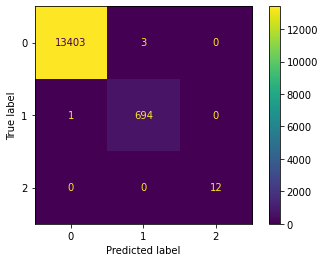

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

In [6]:
   
index1 = []
index2 = []
index3 = [] 
df['target']= 0

#condition 1

index1 = df[df['RU.LNG.214TRA220.PV'] > df['RU.LNG.214TRA220.PV'].quantile(0.99)].index  |\
df[df['RU.LNG.214PRA218C.PV'] < df['RU.LNG.214PRA218C.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214TRA476A.PV'] < df['RU.LNG.214TRA476A.PV'].quantile(0.01)].index  |\
df[df['RU.LNG.214PZA451A.PV'] < df['RU.LNG.214PZA451A.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PDRA425.PV'] < df['RU.LNG.214PDRA425.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PRA431.PV'] > df['RU.LNG.214PRA431.PV'].quantile(0.99)].index  |\
df[df['RU.LNG.214PRA434.PV'] > df['RU.LNG.214PRA434.PV'].quantile(0.99)].index  |\
df[df['RU.LNG.214PRA218.PV'] < df['RU.LNG.214PRA218.PV'].quantile(0.01)].index  |\
df[df['RU.LNG.214PDRA436.PV'] < df['RU.LNG.214PDRA436.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214SZA458.PV'] < df['RU.LNG.214SZA458.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PRA221A.PV'] < df['RU.LNG.214PRA221A.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214PRA221B.PV'] < df['RU.LNG.214PRA221B.PV'].quantile(0.01)].index |\
df[df['RU.LNG.214TR210.PV'] > df['RU.LNG.214TR210.PV'].quantile(0.99)].index |\
df[df['RU.LNG.214PRA218A.PV'] < df['RU.LNG.214PRA218A.PV'].quantile(0.01)].index
    
    
#condition 2    
    
#lube oil level    
index2 = df[df['RU.LNG.214LRSA450.PV'] <= 55].index | \
df[df['RU.LNG.214LRSA450.PV'] <= 45].index 

#condition 3
#lube oil pressure 
index3 = df[df['RU.LNG.214PZA451A.PV'] <= 1.77].index & \
df[df['RU.LNG.214PZA451A.PV'] <= 1.77].index 
  
#defining labels
df.loc[index1, 'target'] = 1  
df.loc[index2, 'target'] = 2  
df.loc[index3, 'target'] = 3      
 
print("Abnormal samples: ",len(df[df['target']==0]), "class2 samples: ",len(df[df['target']==1]) )    
print("Abnormal samples: ",len(df[df['target']==2]), "class2 samples: ",len(df[df['target']==3]) )   



Abnormal samples:  14771 class2 samples:  692
Abnormal samples:  9 class2 samples:  55089


<ipython-input-6-dfc38bc3f3e1>:8: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index1 = df[df['RU.LNG.214TRA220.PV'] > df['RU.LNG.214TRA220.PV'].quantile(0.99)].index  |\
<ipython-input-6-dfc38bc3f3e1>:8: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index1 = df[df['RU.LNG.214TRA220.PV'] > df['RU.LNG.214TRA220.PV'].quantile(0.99)].index  |\
<ipython-input-6-dfc38bc3f3e1>:8: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index1 = df[df['RU.LNG.214TRA220.PV'] > df['RU.LNG.214TRA220.PV'].quantile(0.99)].index  |\
<ipython-input-6-dfc38bc3f3e1>:8: FutureWarning: Index.__or__ operating as a set operation 

In [28]:


X = df.loc[:,'RU.LNG.214PZA451A.PV':].to_numpy() # all measurement columns
y = df['target'].to_numpy() # labels 



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)



from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#model


# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)



# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#cm

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:46:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 99.95%
[[ 2927     2     0     0]
 [    4   132     0     0]
 [    1     0     1     0]
 [    0     0     0 11046]]


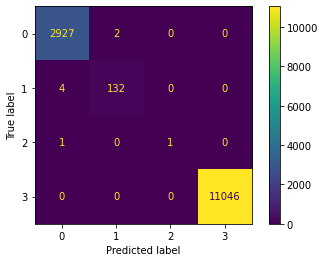

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

In [33]:
#RF

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9995040034011196


In [34]:

#ada boost



# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9903634946503224


In [35]:
#cm

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[ 2929     0     0     0]
 [  136     0     0     0]
 [    0     0     2     0]
 [    0     0     0 11046]]


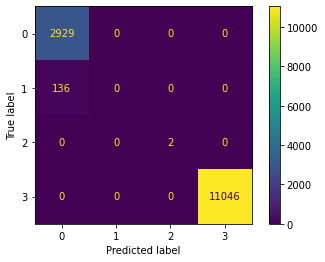

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

In [7]:


dict_classifiers = {
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Neural Net": MLPClassifier(alpha = 1),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost" : XGBClassifier(),
    "LDA" : LinearDiscriminantAnalysis(),
    "CART" : DecisionTreeClassifier()
}

X = df.loc[:,'RU.LNG.214PZA451A.PV':].to_numpy() # all measurement columns
y = df['target'].to_numpy() # labels 


    
#normalized   
'''
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_scaled = scaler.fit_transform(X)
# note that the test set using the fitted scaler in train dataset to transform in the test set
X_test_scaled = scaler.transform(X_test)
'''

#recalls=[]
results = []
names = []
for name, model in list(dict_classifiers.items()):
	kfold = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
 
    

Gradient Boosting Classifier: 0.999461 (0.000222)
Random Forest: 0.999688 (0.000106)


/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Logistic Regression: 0.782982 (0.000736)
Nearest Neighbors: 0.944757 (0.001074)
Decision Tree: 0.999632 (0.000104)
Neural Net: 0.658521 (0.209773)
AdaBoost: 0.990165 (0.000053)
[00:01:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:01:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:01:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:01:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/pooyan/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:01:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost: 0.999646 (0.000142)
LDA: 0.811581 (0.002371)
CART: 0.999617 (0.000085)


In [38]:
results

[array([0.99957486, 0.99978741, 0.9990788 , 0.99936224, 0.99957483]),
 array([0.999504  , 0.99978741, 0.99978741, 0.99971655, 0.99964569]),
 array([0.78183235, 0.7830924 , 0.78266723, 0.78408447, 0.78323413]),
 array([0.94338553, 0.94352324, 0.94579082, 0.94571995, 0.94536565]),
 array([0.99957486, 0.99978741, 0.99964569, 0.99950397, 0.99957483]),
 array([0.61595692, 0.7897534 , 0.78769841, 0.78415533, 0.78521825]),
 array([0.99008007, 0.99015023, 0.99015023, 0.99022109, 0.99022109]),
 array([0.99943315, 0.99985828, 0.99971655, 0.99957483, 0.99964569]),
 array([0.81109615, 0.80789399, 0.81498016, 0.81306689, 0.81087018]),
 array([0.99957486, 0.99971655, 0.99971655, 0.99957483, 0.99957483])]

In [13]:
from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import EasyEnsembleClassifier

dict_classifiers = {
  #  "Ensemble Classifier": EasyEnsembleClassifier(n_estimators=10),
    "Random Forest": RandomForestClassifier(),
  #  "Logistic Regression": LogisticRegression(),
  #  "Nearest Neighbors": KNeighborsClassifier(),
  #  "Decision Tree": DecisionTreeClassifier(),
  #  "Neural Net": MLPClassifier(alpha = 1),
  #  "AdaBoost": AdaBoostClassifier(),
  #  "XGBoost" : XGBClassifier(),
  #  "LDA" : LinearDiscriminantAnalysis(),
  # "CART" : DecisionTreeClassifier()
    "Bagging RF" :  BaggingClassifier()  
}

X = df.loc[:,'RU.LNG.214PZA451A.PV':].to_numpy() # all measurement columns
y = df['target'].to_numpy() # labels 


    
#normalized   
'''
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_scaled = scaler.fit_transform(X)
# note that the test set using the fitted scaler in train dataset to transform in the test set
X_test_scaled = scaler.transform(X_test)
'''

#recalls=[]
results = []
names = []
for name, model in list(dict_classifiers.items()):
	kfold = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
 

Random Forest: 0.999617 (0.000096)
Bagging RF: 0.999575 (0.000119)


In [16]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
X = df.loc[:,'RU.LNG.214PZA451A.PV':].to_numpy() # all measurement columns
y = df['target'].to_numpy() # labels 



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


abc = BaggingClassifier()  
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9995040034011196


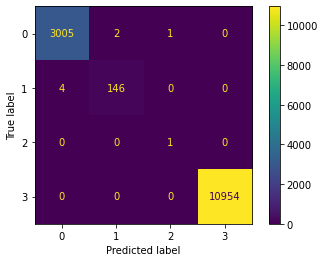

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)  
plt.show()